<a href="https://colab.research.google.com/github/deepanshukanchan/Hotel-Booking-Analysis-project-1/blob/main/team_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **introduction**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.
Project Title: Hotel Booking Analysis

In [ ]:
#importing required libraries
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 500)
%matplotlib inline

In [ ]:
path = "/content/drive/MyDrive/Hotel Bookings.csv"

In [ ]:
#reading data
dfhotelbook = pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [ ]:
dfhotelbook.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [ ]:
# check datatype
dfhotelbook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#look at the statistical
dfhotelbook.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
dfhotelbook.shape

(119390, 32)

In [ ]:
#  Checking for missing values in a column
dfhotelbook.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Drop columns with high missing values
dfhotelbook.isnull().sum()/len(dfhotelbook.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
# Drop columns with high missing values
dfhotelbook=dfhotelbook.drop(['agent','company'],axis=1)

In [ ]:
# delete rows with empty cells
dfhotelbook = dfhotelbook.dropna(axis = 0)

In [ ]:
#Now I will drop the days_in_waiting_list column because we won't use it for this analysis
dfhotelbook = dfhotelbook.drop(labels='days_in_waiting_list', axis=1)

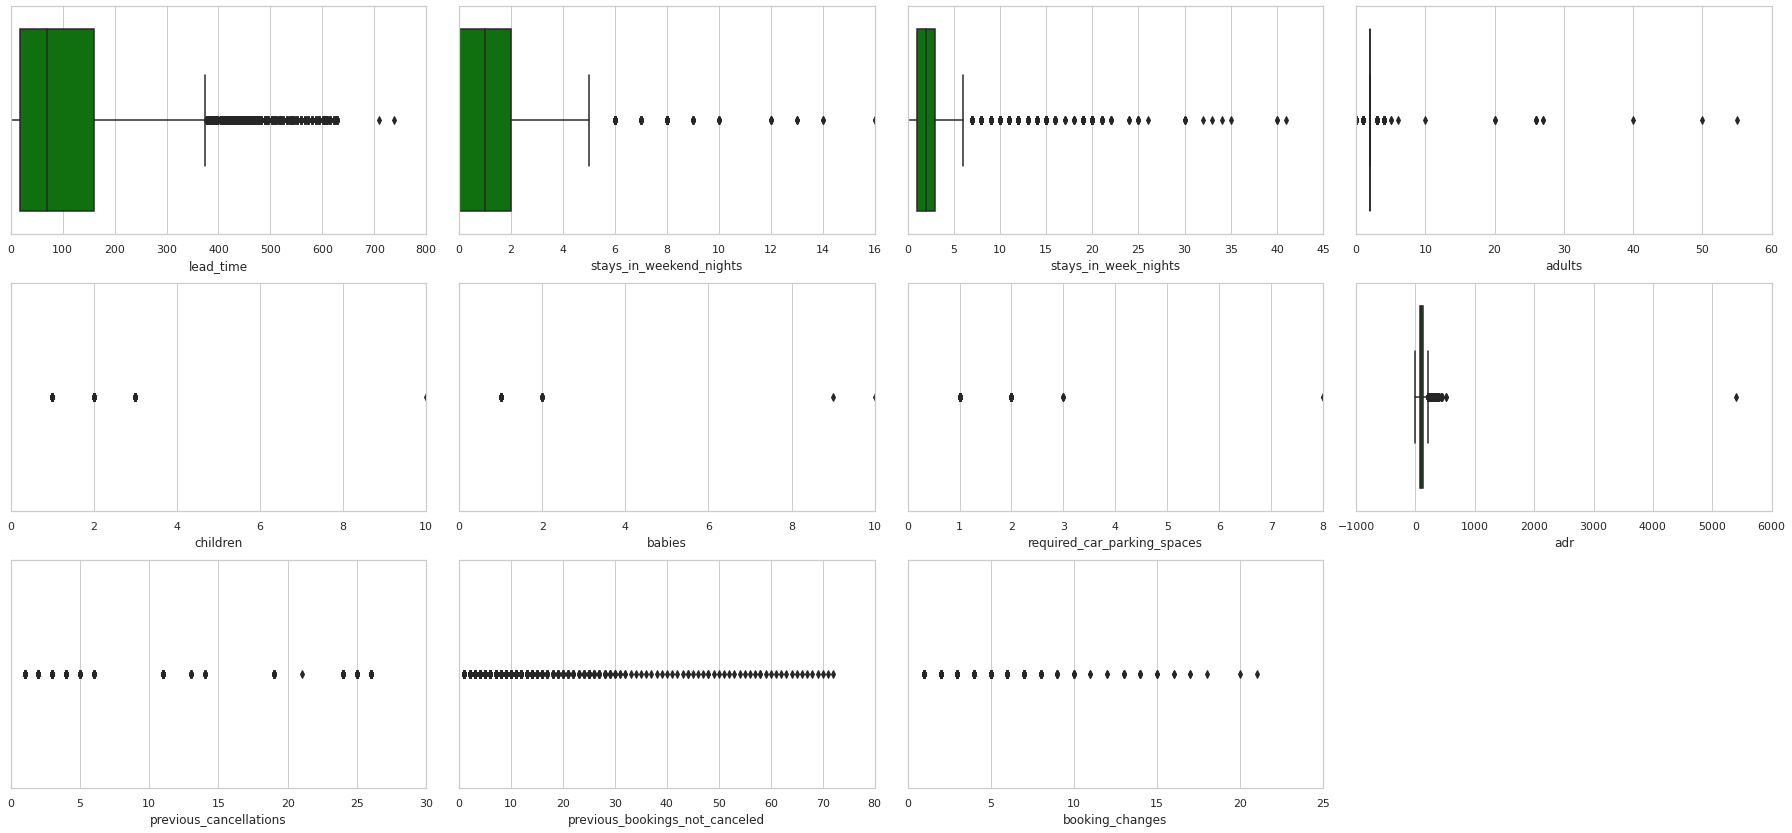

In [ ]:
# build boxplots to see it better
hotelfeature = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.rcParams['figure.figsize'] = 25,15
for column in hotelfeature:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(dfhotelbook[column],color=('green'))
  plt.tight_layout()

In [ ]:
# Remove the outliers by using conditionals to get and update these values
dfhotelbook.loc[dfhotelbook.lead_time > 500, 'lead_time'] = 500
dfhotelbook.loc[dfhotelbook.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
dfhotelbook.loc[dfhotelbook.adults > 4, 'adults'] = 4
dfhotelbook.loc[dfhotelbook.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
dfhotelbook.loc[dfhotelbook.previous_cancellations > 0, 'previous_cancellations'] = 1
dfhotelbook.loc[dfhotelbook.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
dfhotelbook.loc[dfhotelbook.booking_changes > 5, 'booking_changes'] = 5
dfhotelbook.loc[dfhotelbook.babies > 8, 'babies'] = 0
dfhotelbook.loc[dfhotelbook.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
dfhotelbook.loc[dfhotelbook.children > 8, 'children'] = 0
dfhotelbook.loc[dfhotelbook.adr > 1000, 'adr'] = 1000


1.   In this section, we will explore the data to get insights about it. 

2.   Lets merge 'children' and 'babies' columns into 'kids' column.

3.   Then, we set the string type to the corresponding columns.


In [ ]:
dfhotelbook['kids'] = dfhotelbook.children + dfhotelbook.babies

# Marge total mumbers by adding kids and adults
dfhotelbook['total_members'] = dfhotelbook.kids + dfhotelbook.adults

# Convert the datatypes to string
dfhotelbook['arrival_date_year'] = dfhotelbook['arrival_date_year'].astype('str')
dfhotelbook['arrival_date_month'] = dfhotelbook['arrival_date_month'].astype('str')
dfhotelbook['arrival_date_day_of_month'] = dfhotelbook['arrival_date_day_of_month'].astype('str')
dfhotelbook['is_canceled'] = dfhotelbook['is_canceled'].astype('str')
dfhotelbook['is_repeated_guest'] = dfhotelbook['is_repeated_guest'].astype('str')

## **Now We Will Do Data Analysis and Visualization**

## **✅hotels** 

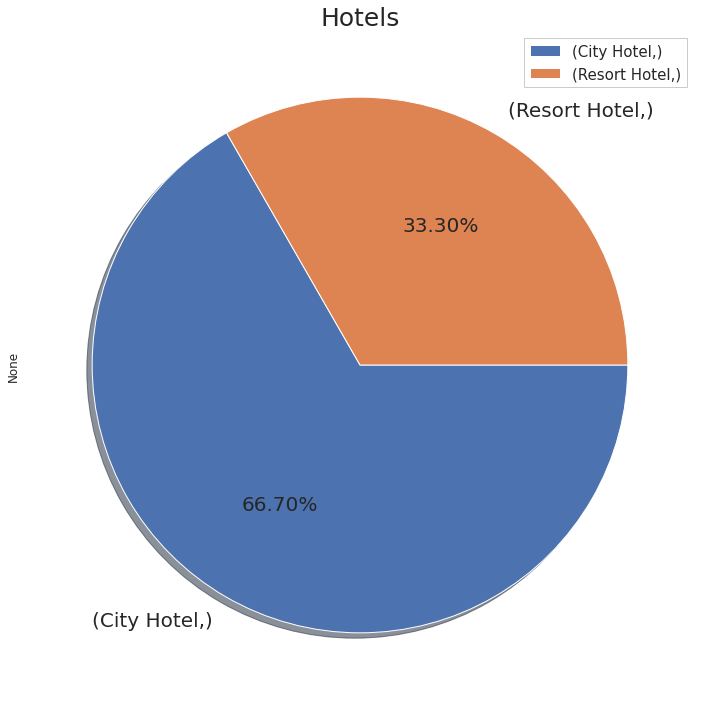

In [ ]:
plt.figure(figsize=(12,12))
# use a pie chart
(dfhotelbook[['hotel']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20} ,shadow=True, counterclock=False)
plt.title('Hotels',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()



*   City hotels are more available as compared to resort hotels



*  City hotel are available 66.70% List item
*  
Resort hotel are available 33.30%List item List item







## **✅country**

In [ ]:
#now we calculate the that country where most of people come from
country = dfhotelbook[['country']].value_counts()

Text(0.5, 1.0, 'country')

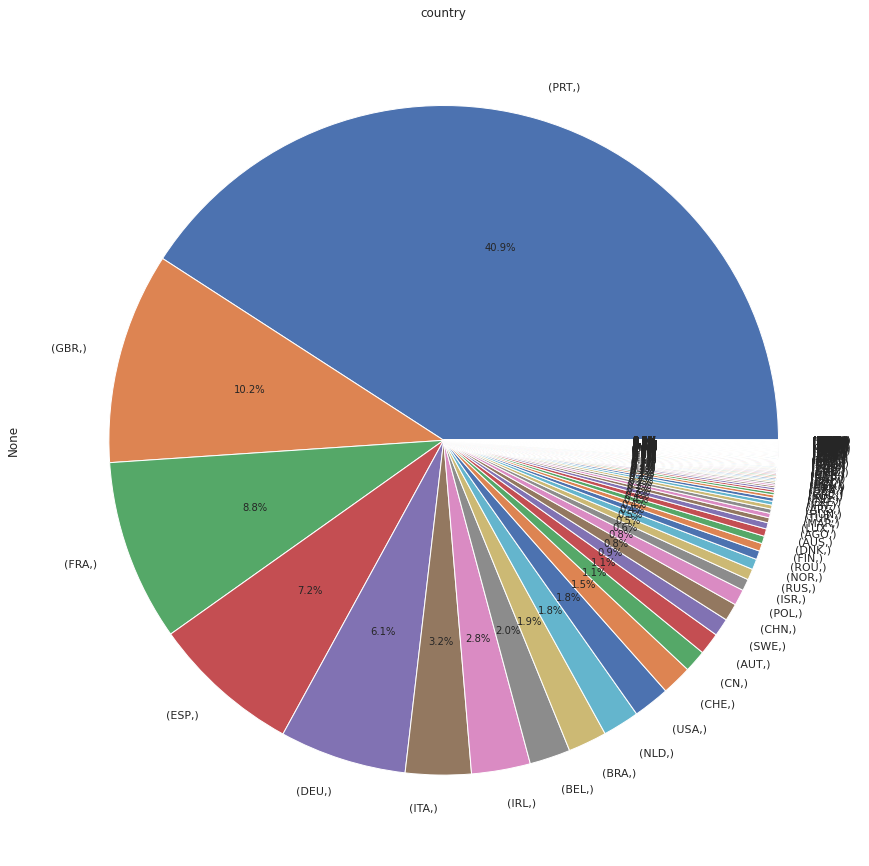

In [ ]:
country.plot.pie(autopct='%1.1f%%')
plt.title('country')

as we can see most guests are from portugal, UK, France, spain and other European countries.

---


 # ✅ Total Canceled booking and Confirmed booking 

---
* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 

In [ ]:
pd.DataFrame((dfhotelbook[['is_canceled']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Total Numbers of Bookings % (Canceled = 1) and (Confirmed = 0) '])

,Total Numbers of Bookings % (Canceled = 1) and (Confirmed = 0)
is_canceled,
1,37.135192
0,62.864808


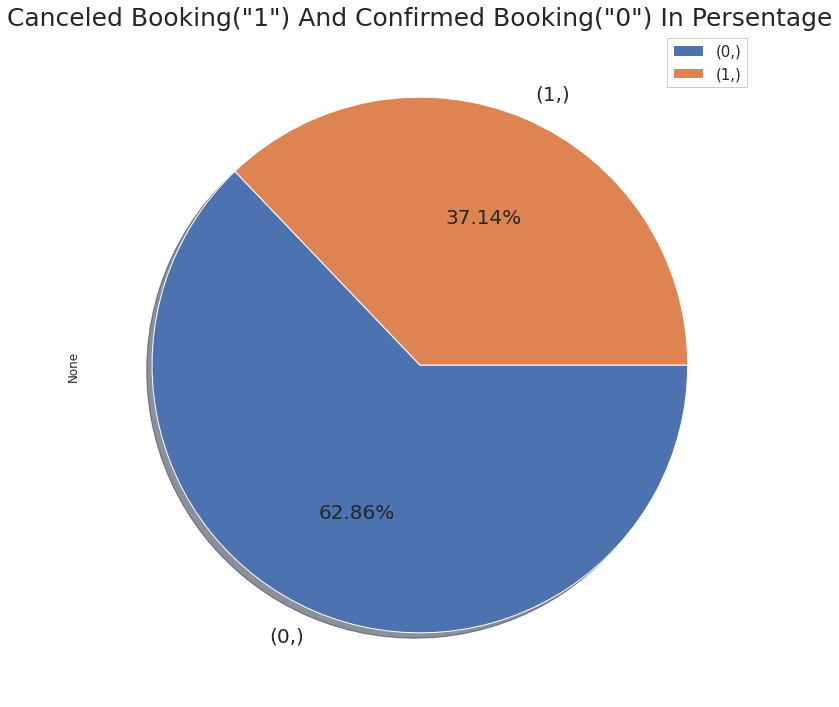

In [ ]:
plt.figure(figsize=(12,12))
# Ues a pie chart
(dfhotelbook[['is_canceled']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20},shadow=True, counterclock=False)
plt.title('Canceled Booking("1") And Confirmed Booking("0") In Persentage',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

*   74745 bookings were canceled which is  62.86%
*   44153 bookings were canceled which is  37.14%


italicized text


---


# ✅ Canceled Booking and Confirmed Booking In ***'  The Hotels '***

---


* 1 **:** ▶ Canceled booking 
* 0 **:** ▶ Confirmed booking 

In [ ]:
pd.DataFrame(dfhotelbook[['hotel','is_canceled']].value_counts().sort_values(),
             columns=['Hotel wise Canceled Booking("1") And Confirmed Booking("0")'])

Hotel wise Canceled Booking("1") And Confirmed Booking("0")
hotel        is_canceled                                                             
Resort Hotel 1                                                        11077          
             0                                                        28519          
City Hotel   1                                                        33076          
             0                                                        46226

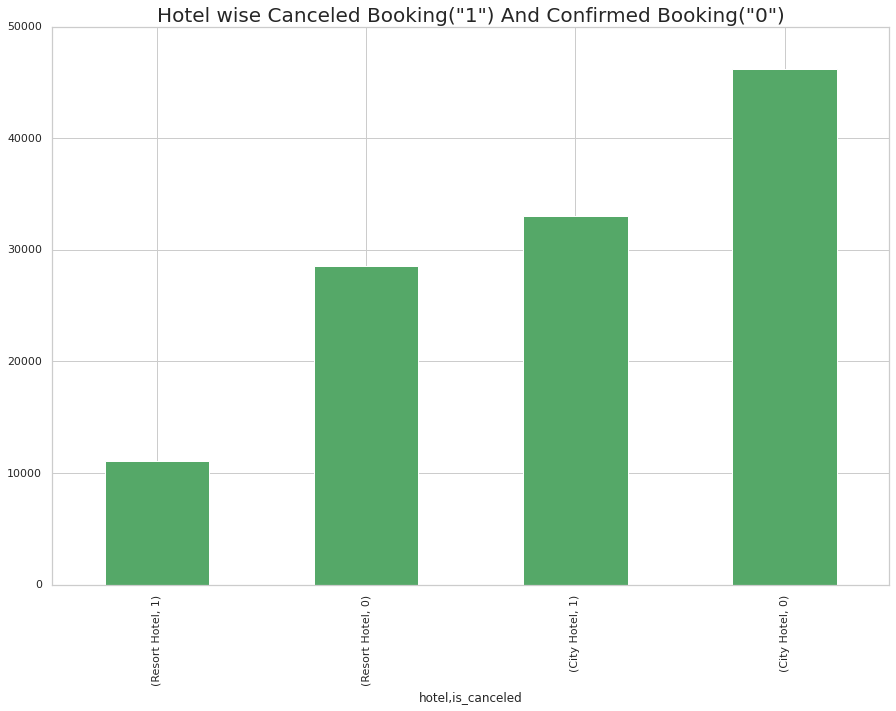

In [ ]:
plt.figure(figsize=(15,10))
# bar plot
dfhotelbook[['hotel','is_canceled']].value_counts().sort_values().plot(kind='bar',color='g')
plt.title('Hotel wise Canceled Booking("1") And Confirmed Booking("0")',
          fontsize = 20)
# Show the bar plot
plt.show()

city hotels had the most bookings as compared to resort hotels

In [ ]:
pd.DataFrame((dfhotelbook[['hotel','is_canceled']].value_counts(normalize=True)*[100]).sort_values(),
             columns=['Hotel wise Canceled Booking("1") And Confirmed Booking("0") In Percentades'])

Hotel wise Canceled Booking("1") And Confirmed Booking("0") In Percentades
hotel        is_canceled                                                                            
Resort Hotel 1                                                     9.316389                         
             0                                                    23.986106                         
City Hotel   1                                                    27.818803                         
             0                                                    38.878703

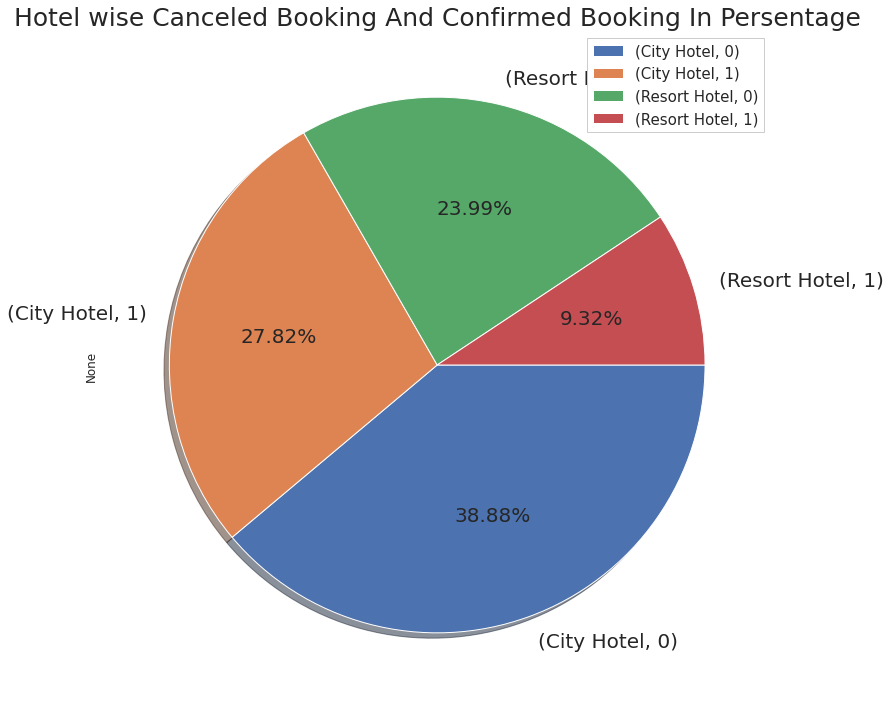

In [ ]:
plt.figure(figsize=(12,12))
# pie chart
(dfhotelbook[['hotel','is_canceled']].value_counts(normalize=True)*[100]).sort_index().plot(kind='pie', autopct='%1.2f%%',textprops={'fontsize': 20},shadow=True, counterclock=False)
plt.title('Hotel wise Canceled Booking And Confirmed Booking In Persentage',
          fontsize = 25)
plt.legend(fontsize = 15)
# Show the pie chart
plt.show()

## **✅market segment**

In [ ]:
# now we colculate the market of hotels
market = dfhotelbook['market_segment'].value_counts()

Text(0.5, 1.0, 'market size')

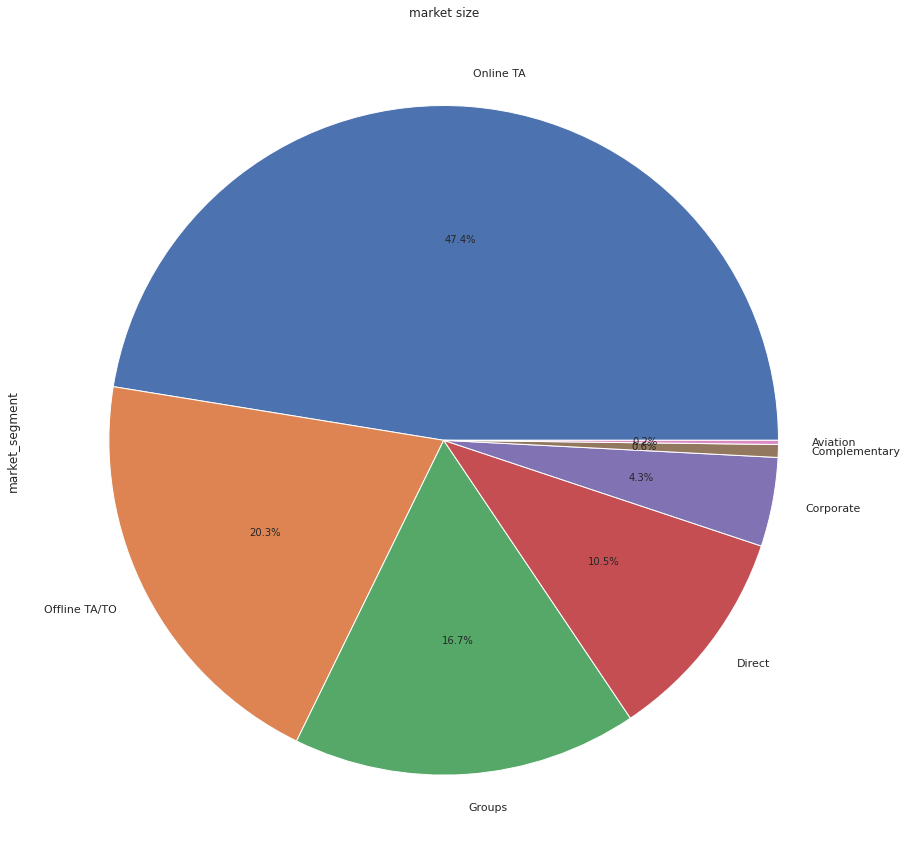

In [ ]:
market.plot.pie(autopct='%1.1f%%')
plt.title('market size')



*   in this pie chart we show that approx 40.7% people use online TA to book their hotel room.and 4.4% from coporate
*   20.3% people use offlineTA and 10.6% people book their room directlyand 16.6% people book thair room in group



## **✅meal** 

In [ ]:
# price of meal
meal = dfhotelbook['meal'].value_counts()

Text(0.5, 1.0, 'meal')

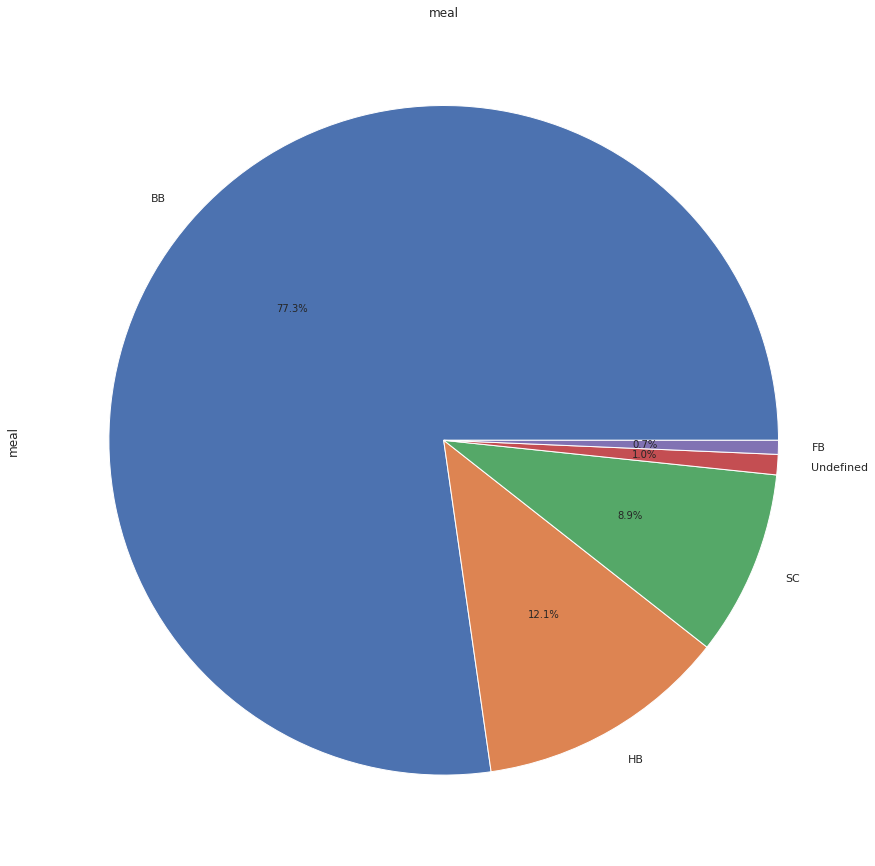

In [ ]:
meal.plot.pie(autopct='%1.1f%%')
plt.title('meal')



*   most of meal in BB which is 77.3% and HB is on 2nd number with 12.1% and sc is 8.9




## **✅busiest month** 
**Which month hotels have high revenue?




In [ ]:
#Making list of months available in year
month_in_year=['January', 'February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
#Here we are using .categorical which colect all data in list month_in_year
dfhotelbook['arrival_date_month']=pd.Categorical(dfhotelbook['arrival_date_month'],categories=month_in_year,ordered=True)

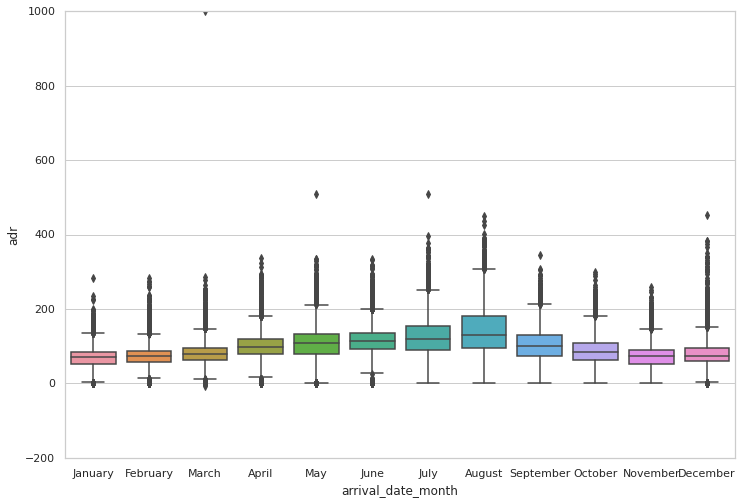

In [ ]:
#providing size to figure 
plt.figure(figsize = (12,8))
#print on x-axis 'arrival_date_month' and y axis 'adr'
sns.boxplot(x = dfhotelbook['arrival_date_month'],y = dfhotelbook['adr'])
plt.show()



*   From above Analysis we can say that less peoples are visited to Hotel in january month.so,revenue having huge cut off
*   But,hotels have large revenue in August due to more people visiting.



In [ ]:
#Find unique values
dfhotelbook['arrival_date_year'].unique()

array(['2015', '2016', '2017'], dtype=object)

In [ ]:
#Count Values present in column
yearly_count_hotel=dfhotelbook['arrival_date_year'].value_counts()
yearly_count_hotel

2016    56435
2017    40604
2015    21859
Name: arrival_date_year, dtype: int64

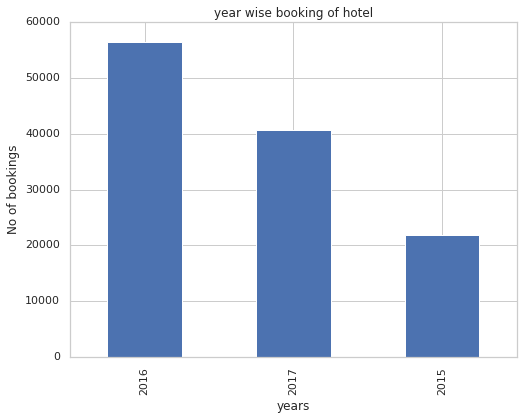

In [ ]:
#Determine size for figure
plt.figure(figsize=(8,6))

##Analysis by using plot bar 
yearly_count_hotel.plot.bar()
plt.xlabel('years')
plt.ylabel('No of bookings')
plt.title('year wise booking of hotel')
plt.show()


*   From Above Graph it is clear that 2016 had higher bookings compared to 2017 and 2015.
*   so,according to given data there is increment of booking with alternate years



## **✅conclusion** 




*   The majority of guests come from western european countries.
* The percentage of city hotel is 66.45%.while the percentage of resort hotel is 33.55% is use to stay.So,City hotel connect more no of peoples and having higher lead time
* For longer stay peoples are choose Resort hotel and for short stay choose city hotel
* City Hotel bookings are more canceled
* Here,TA/TO distribution channel having longer waiting time
* More people visit hotels in August and less people visit in January.
* BB.(i.e Bed & Breakfast) is most preferable type of meal for 77.8% guest
* Most of the peoples are come from PRT (i.e.Portugal)
* Year 2016 having higher bookings compared to year 2017 and 2015.






